William Craig

March 30, 2023

Focus on SciPy

First problem: curve fitting.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [25]:
#First mock up function:
def f(x, a, b, c):
    return a* np.exp(-b*x)+c

1) Generate data

2) Export to file

3) Read that file

In [26]:
x = np.linspace(0,4,50)
y = f(x, a = 2.5, b = 1.3, c = 0.5)
yi = y + 0.2 * np.random.normal(size = len(x))

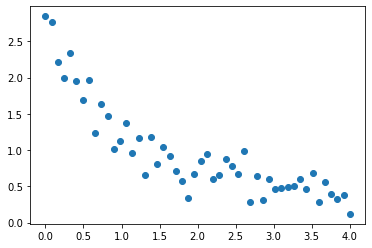

In [49]:
plt.plot(x,yi, 'o', label = 'data $y_i$')

Now save data to a file. Remember that np produces arrays for the x linspace and y outputs.

In [28]:
s1 = pd.Series(x)
s2 = pd.Series(yi)
#axis = 1 transforms the data from a row to a column format
df = pd.concat([s1, s2], axis = 1)

In [29]:
df.to_csv("dataXYZ.csv", index = False)

In [30]:
df2 = pd.read_csv("dataXYZ.csv")

In [31]:
df2.to_numpy(dtype=None, copy = False)

array([[0.        , 2.84486476],
       [0.08163265, 2.76734029],
       [0.16326531, 2.21850807],
       [0.24489796, 1.99188502],
       [0.32653061, 2.33924027],
       [0.40816327, 1.95847061],
       [0.48979592, 1.6874211 ],
       [0.57142857, 1.96839244],
       [0.65306122, 1.24071067],
       [0.73469388, 1.64086931],
       [0.81632653, 1.47540901],
       [0.89795918, 1.01209824],
       [0.97959184, 1.11910208],
       [1.06122449, 1.37911609],
       [1.14285714, 0.96013391],
       [1.2244898 , 1.16621032],
       [1.30612245, 0.66064132],
       [1.3877551 , 1.17930061],
       [1.46938776, 0.80665966],
       [1.55102041, 1.03984992],
       [1.63265306, 0.91624419],
       [1.71428571, 0.7101172 ],
       [1.79591837, 0.57776914],
       [1.87755102, 0.34403197],
       [1.95918367, 0.67296555],
       [2.04081633, 0.852967  ],
       [2.12244898, 0.94792407],
       [2.20408163, 0.59587201],
       [2.28571429, 0.6501303 ],
       [2.36734694, 0.8775009 ],
       [2.

Need to locate first column. They are named 0 and 1.

In [38]:
# column_0 = df2.loc[:, '0']

# print(column_0)

In [42]:
x1 = df2.loc[:, '0'].to_numpy(dtype = None, copy = False)
y1 = df2.loc[:, '1'].to_numpy(dtype = None, copy = False)

In [ ]:
curve_fit(f, x1, y1)

In [44]:
p_opt, p_cov = curve_fit(f, x1, y1)
print(p_opt)

[2.36337817 1.09960595 0.42862829]


In [45]:
yfitted = f(x, *p_opt)

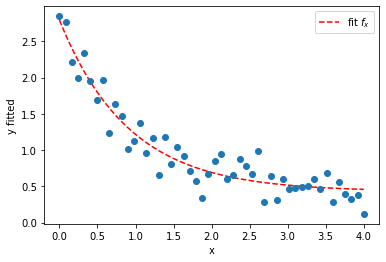

In [52]:
plt.plot(x1, yfitted, 'r--', label = 'fit $f_x$')

plt.xlabel('x')
plt.ylabel('y fitted')
plt.legend()

plt.plot(x,yi, 'o', label = 'data $y_i$')

plt.savefig('curvefit.png')

New section

Text(0, 0.5, 'DFT(signal)')

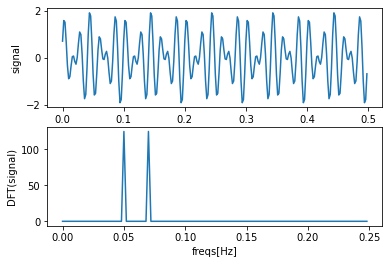

In [74]:
from scipy.fft import fft

signal_length = 0.5
sample_rate = 500
dt = 1.0/sample_rate

t = np.arange(0, signal_length, dt)

n_t = len(t)
y = np.sin(22*np.pi*50*t) + np.sin(2*np.pi*70*t + np.pi/4)

ft = fft(y)
freqs = dt * np.arange(0, (n_t - 1)/2, dtype = 'd')
n_freq = len(freqs)

#Put original data on top and frequency data at bottom
plt.subplot(2, 1, 1)
plt.plot(t,y, label = 'input data')
plt.xlabel("time[s]")
plt.ylabel("signal")

#Now plot frequency data with frequency on x and y has amplitude

plt.subplot(2,1,2)

plt.plot(freqs, abs(ft[0:n_freq]), label = 'fourier_transform')

plt.xlabel("freqs[Hz]")
plt.ylabel("DFT(signal)")